In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import bgmm.gmm as gmm
from bgmm.distributions import Gaussian, InverseGamma, Multinomial, Dirichlet
from matplotlib.mlab import normpdf

In [2]:
# Generate synthetic data
means = np.array([ 1, 2, 3])
sigmas = np.array([0.2, 0.3, 0.1])
coef = np.array([0.2, 0.3, 0.5])
cdf = np.cumsum(coef)

samples = np.zeros([5000])
for i in range(samples.shape[0]):
    rand = np.random.random()
    m = cdf.searchsorted(rand)
    samples[i] = sigmas[m]*np.random.randn() + means[m]

In [3]:
# put samples into (N x D) matrix. 
samples = samples[:, np.newaxis]

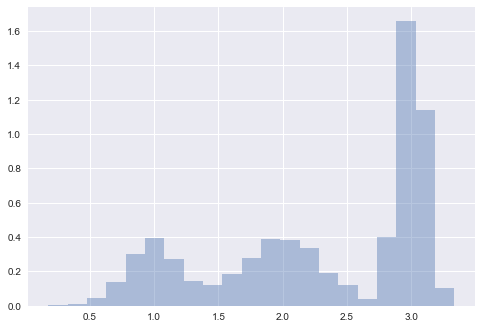

In [4]:
seaborn.distplot(samples, kde=False, norm_hist=True);

In [5]:
# Initialize state
z = np.random.randint(low=0, high=3, size=10000)
p = np.random.dirichlet([1, 1, 1])
mu = np.random.uniform(low=0, high=4, size=3)
mu = np.array([[mu[0]], [mu[1]], [mu[2]]])
sigma = np.array([0.1, 0.1, 0.1])
state = gmm.State(z=z, mu=mu, sigma_aq_mu=1, sigma_sq_n=sigma, pi=p)

In [6]:
# Initialiize model
alpha = np.array([1, 1, 1])
K = 3
sigma = np.array([0.001, 0.001, 0.001])
sigma_mu = InverseGamma(0.0001, 0.0001)
sigma_n = InverseGamma(sigma, sigma)
model = gmm.Model(alpha=alpha, K=K, sigma_sq_mu_prior=sigma_mu, sigma_sq_n_prior=sigma_n)

In [7]:
sampler = gmm.Sampler(niter=1000, model=model, state=state, X=samples, prior='Jeff')

In [8]:
sampler.sample()

100%|██████████| 1000/1000 [00:29<00:00, 34.46it/s]


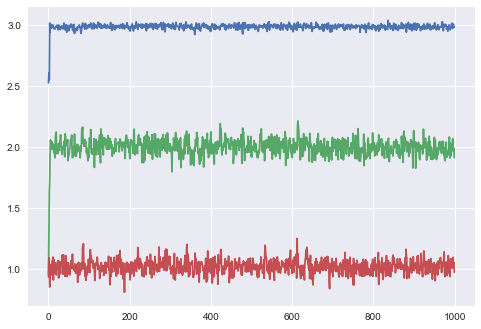

In [9]:
plt.plot(sampler.logger['mean'][:, 0])
plt.plot(sampler.logger['mean'][:, 1])
plt.plot(sampler.logger['mean'][:, 2])

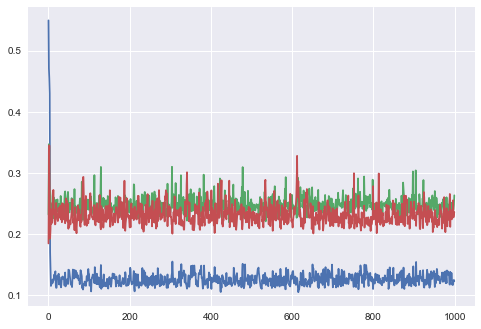

In [10]:
plt.plot(np.sqrt(sampler.logger['sigma_sq_n'][:]))

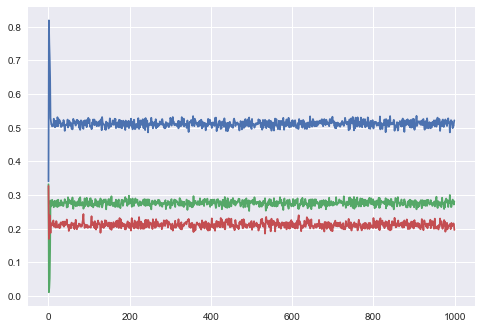

In [11]:
plt.plot(sampler.logger['pi'][:, 0])
plt.plot(sampler.logger['pi'][:, 1])
plt.plot(sampler.logger['pi'][:, 2])

In [12]:
sampler.state.z

array([2, 0, 0, ..., 1, 2, 2])

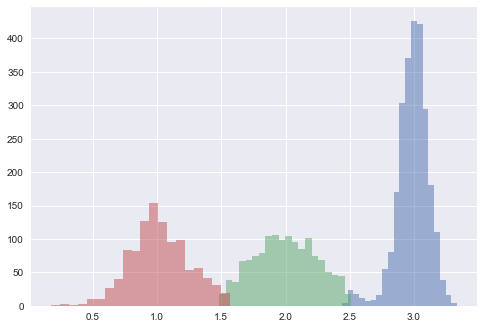

In [13]:
alpha=0.5
plt.hist(samples[np.where(sampler.state.z==0)], alpha=alpha, bins=20);
plt.hist(samples[np.where(sampler.state.z==1)], alpha=alpha, bins=20);
plt.hist(samples[np.where(sampler.state.z==2)], alpha=alpha, bins=20);

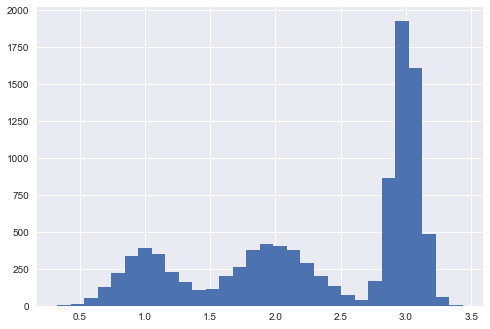

In [14]:
#seaborn.distplot(samples, kde=False)
plt.hist(samples, bins=30);